In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/auth_logs.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.head()

Matplotlib is building the font cache; this may take a moment.


,timestamp,username,source_ip,location,device,event_type
0,2026-01-12 14:49:17,rima,198.51.100.23,Unknown,Windows-10,SUCCESS
1,2026-01-15 00:43:17,mvargas,203.0.113.5,"Berlin, DE",Windows-10,FAILED
2,2026-01-11 09:01:17,mvargas,192.168.1.10,"Mexico City, MX",Android,SUCCESS
3,2026-01-09 23:10:17,guest,198.51.100.23,"Salt Lake City, US",Linux,SUCCESS
4,2026-01-11 11:21:17,finance1,172.16.0.9,"Berlin, DE",Windows-10,SUCCESS


In [2]:
df["event_type"].value_counts()


event_type
SUCCESS    782
FAILED     499
Name: count, dtype: int64

In [3]:
failed = df[df["event_type"] == "FAILED"]
failed_by_ip = failed["source_ip"].value_counts().head(10)
failed_by_ip


source_ip
45.33.32.156     132
192.168.1.10      79
198.51.100.23     76
10.0.0.8          72
203.0.113.5       70
172.16.0.9        70
Name: count, dtype: int64

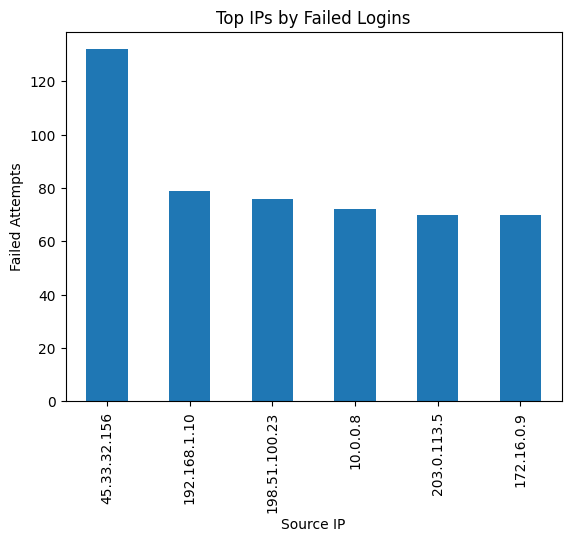

In [4]:
failed_by_ip.plot(kind="bar")
plt.title("Top IPs by Failed Logins")
plt.xlabel("Source IP")
plt.ylabel("Failed Attempts")
plt.show()


In [5]:
failed["username"].value_counts().head(10)


username
admin       137
mvargas      73
helpdesk     64
finance2     63
guest        57
finance1     56
rima         49
Name: count, dtype: int64

In [6]:
df_sorted = df.sort_values(["username", "source_ip", "timestamp"])

suspicious = []
for (user, ip), group in df_sorted.groupby(["username", "source_ip"]):
    group = group.reset_index(drop=True)
    for i in range(10, len(group)):
        window = group.iloc[i-10:i+1]
        if (window["event_type"].iloc[:-1] == "FAILED").all() and window["event_type"].iloc[-1] == "SUCCESS":
            suspicious.append((user, ip, window["timestamp"].iloc[-1]))

pd.DataFrame(suspicious, columns=["username", "source_ip", "timestamp_of_success"])


,username,source_ip,timestamp_of_success
0,admin,45.33.32.156,2026-01-13 23:45:17


C:\Users\varga\AppData\Local\Temp\ipykernel_13500\1544872591.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  failed_time = failed.set_index("timestamp").resample("1H").size()


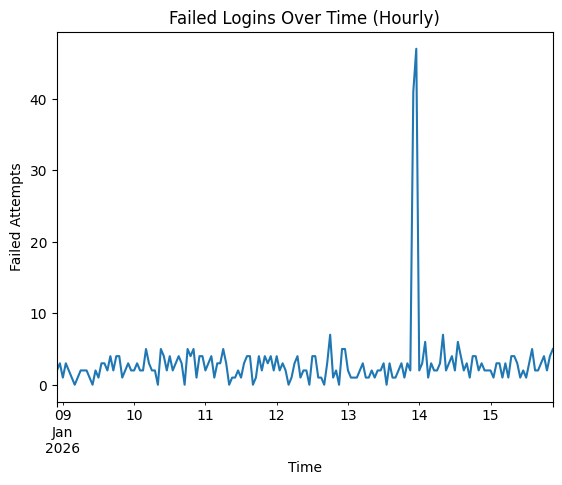

In [7]:
failed_time = failed.set_index("timestamp").resample("1H").size()
failed_time.plot()
plt.title("Failed Logins Over Time (Hourly)")
plt.xlabel("Time")
plt.ylabel("Failed Attempts")
plt.show()
